<a href="https://colab.research.google.com/github/anujott-codes/ford-car-price-prediction/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
adhurimquku_ford_car_price_prediction_path = kagglehub.dataset_download('adhurimquku/ford-car-price-prediction')

print('Data source import complete.')


Data source import complete.


In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ford-car-price-prediction/ford.csv


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Loading

In [9]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [10]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/YT/Projects/Car_Price_Prediction_Kaggle/ford.csv")
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [11]:
df.shape

(17966, 9)

In [12]:
#basic info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [13]:
#statistical knowledge
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


# *Problems:*
* Future Year (2060)
* Too high mpg (201.8)
* engineSize (0)

In [14]:
#checking null values
df.isnull().sum()

,0
model,0
year,0
price,0
transmission,0
mileage,0
fuelType,0
tax,0
mpg,0
engineSize,0


# EDA

In [15]:
#checking for cars with future years
df[df['year'] > 2025]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
17726,Fiesta,2060,6495,Automatic,54807,Petrol,205,42.8,1.4


In [16]:
#just a single record so can be dropped
#dropping false record
df = df[df['year'] <= 2025]

In [17]:
#checking for records with unrealistic too high mpg
df[df['mpg']>100]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
6153,Kuga,2020,31000,Semi-Auto,10,Hybrid,135,201.8,2.5
6536,Kuga,2020,31991,Semi-Auto,2357,Hybrid,135,201.8,2.5
9220,Kuga,2020,32000,Automatic,10,Hybrid,140,201.8,2.5
12862,Kuga,2020,33500,Automatic,5534,Hybrid,140,201.8,2.5
13730,Kuga,2020,32995,Automatic,11,Hybrid,135,201.8,2.5


In [18]:
# Imputed realistic MPG for Ford Kuga 2020 Hybrid 2.5L
# Source: https://www.ford.co.uk/cars/kuga/specs
df.loc[df['mpg']>100,'mpg'] = 49.7

In [19]:
#rechecking for any unrealistic value and proper imputation
df[df['mpg']>100]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize


In [20]:
#checking for records with engineSize -> 0
df[df['engineSize'] == 0]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
13862,Kuga,2019,18990,Manual,8389,Petrol,150,35.3,0.0
14064,Focus,2016,15500,Manual,28344,Diesel,20,67.3,0.0
14082,Focus,2015,14300,Manual,40457,Diesel,20,67.3,0.0
15343,KA,2018,10000,Manual,10051,Petrol,150,43.5,0.0
15500,EcoSport,2015,8500,Manual,33403,Diesel,30,61.4,0.0
15775,Focus,2017,13000,Manual,24484,Diesel,145,70.6,0.0
16312,Focus,2015,9170,Manual,28000,Petrol,20,61.4,0.0
16313,Focus,2019,18699,Manual,10000,Petrol,145,46.3,0.0
16321,Fiesta,2017,9899,Manual,10000,Petrol,0,65.7,0.0
16322,Ka+,2018,9999,Manual,15000,Petrol,145,43.5,0.0


In [21]:
#many records so need imputation
#replacing 0 -> nan
df['engineSize'] = df['engineSize'].replace(0,np.nan)
df.isnull().sum()

,0
model,0
year,0
price,0
transmission,0
mileage,0
fuelType,0
tax,0
mpg,0
engineSize,51


In [22]:
#checking median engineSize per model per fueltype
median_engineSizes = df.groupby(['model','fuelType'])['engineSize'].median().reset_index()
median_engineSizes

,model,fuelType,engineSize
0,B-MAX,Diesel,1.5
1,B-MAX,Petrol,1.0
2,C-MAX,Diesel,1.5
3,C-MAX,Petrol,1.0
4,EcoSport,Diesel,1.5
5,EcoSport,Petrol,1.0
6,Edge,Diesel,2.0
7,Escort,Petrol,1.8
8,Fiesta,Diesel,1.5
9,Fiesta,Petrol,1.0


In [23]:
median_engineSizes.rename(columns={'engineSize': 'median_engineSize'}, inplace=True)

#merging this df to original df
df = df.merge(median_engineSizes, on=['model', 'fuelType'], how='left')

#imputing null values
df['engineSize'] = df['engineSize'].fillna(df['median_engineSize'])

#dropping helper column
df.drop(columns='median_engineSize', inplace=True)

df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [24]:
#checking for any remaing null value or inconsistency in engineSize
df.isnull().sum()

,0
model,0
year,0
price,0
transmission,0
mileage,0
fuelType,0
tax,0
mpg,0
engineSize,1


In [25]:
df[df['engineSize'].isnull()]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
16371,Puma,2019,23999,Manual,3000,Hybrid,150,50.4,NaN


In [26]:
# Impute engineSize for 2019 Ford Puma Hybrid with Realistic value
df['engineSize'] = df['engineSize'].fillna(1.0)

In [27]:
#final check for inconsistency
df[df['engineSize'].isnull()]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize


In [28]:
#final check for inconsistency
df.isnull().sum()

,0
model,0
year,0
price,0
transmission,0
mileage,0
fuelType,0
tax,0
mpg,0
engineSize,0


In [29]:
def distplot(col,num):
    plt.subplot(3,2,num)
    sns.histplot(data = df,x = col,kde = True)
    plt.title(f'{col}')
    plt.tight_layout()

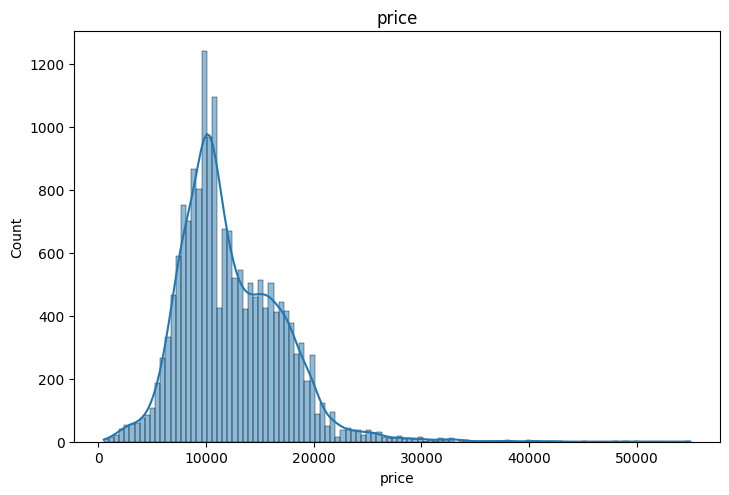

In [30]:
plt.figure(figsize=(14,14))
distplot('price',1)
plt.show()

price -> right skewed

<Axes: >

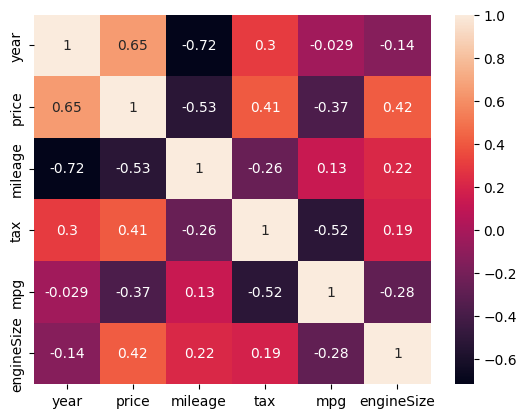

In [31]:
#heatmap to check correlation between numeric cols and price
sns.heatmap(df.corr(numeric_only = True),annot=True)

In [32]:
#selecting numeric features
numeric_features = df.select_dtypes(include='number').columns.to_list()
numeric_features.remove('price')
numeric_features

['year', 'mileage', 'tax', 'mpg', 'engineSize']

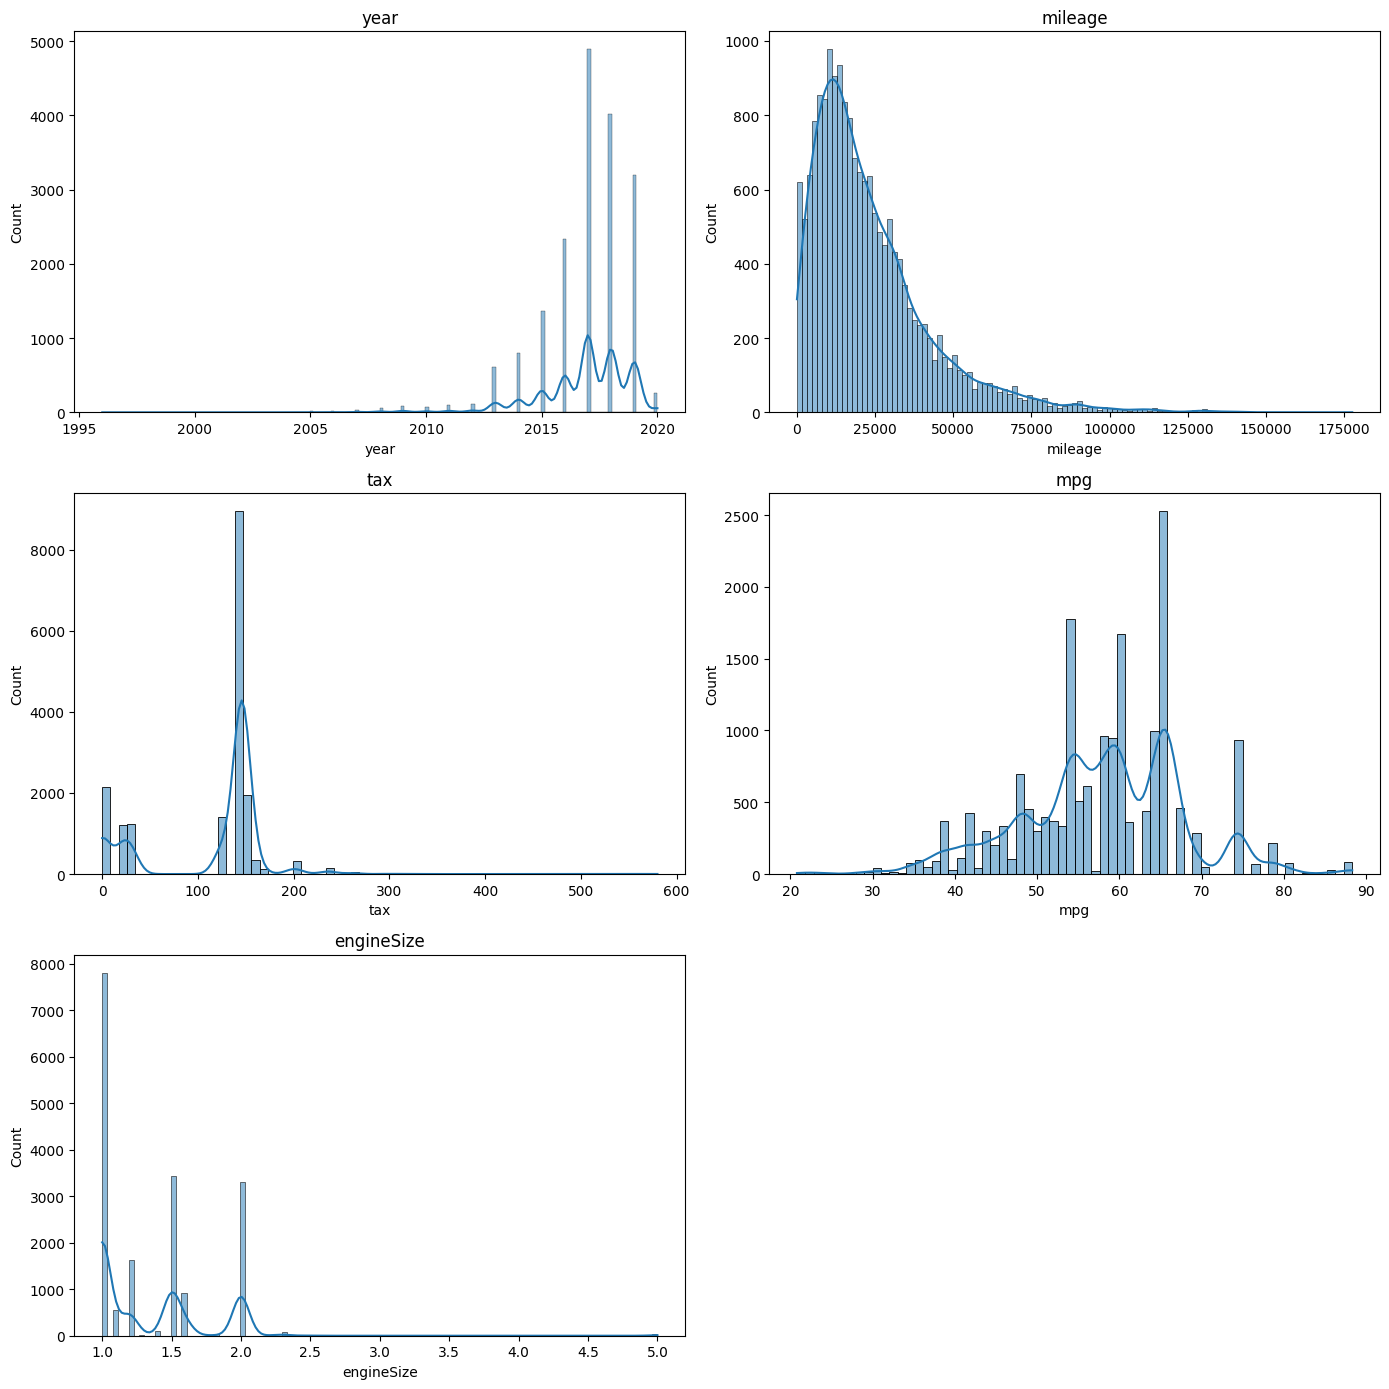

In [33]:
#plotting distribution for all numeric features
plt.figure(figsize=(14,14))
for i,col in enumerate(numeric_features):
    distplot(col,i+1)

plt.show()

In [34]:
#function for plotting countplot
def countplot(col,num):
    plt.subplot(3,2,num)
    sns.countplot(data = df,x = col)
    plt.title(f'{col}')
    plt.xticks(rotation = 90)
    plt.tight_layout()

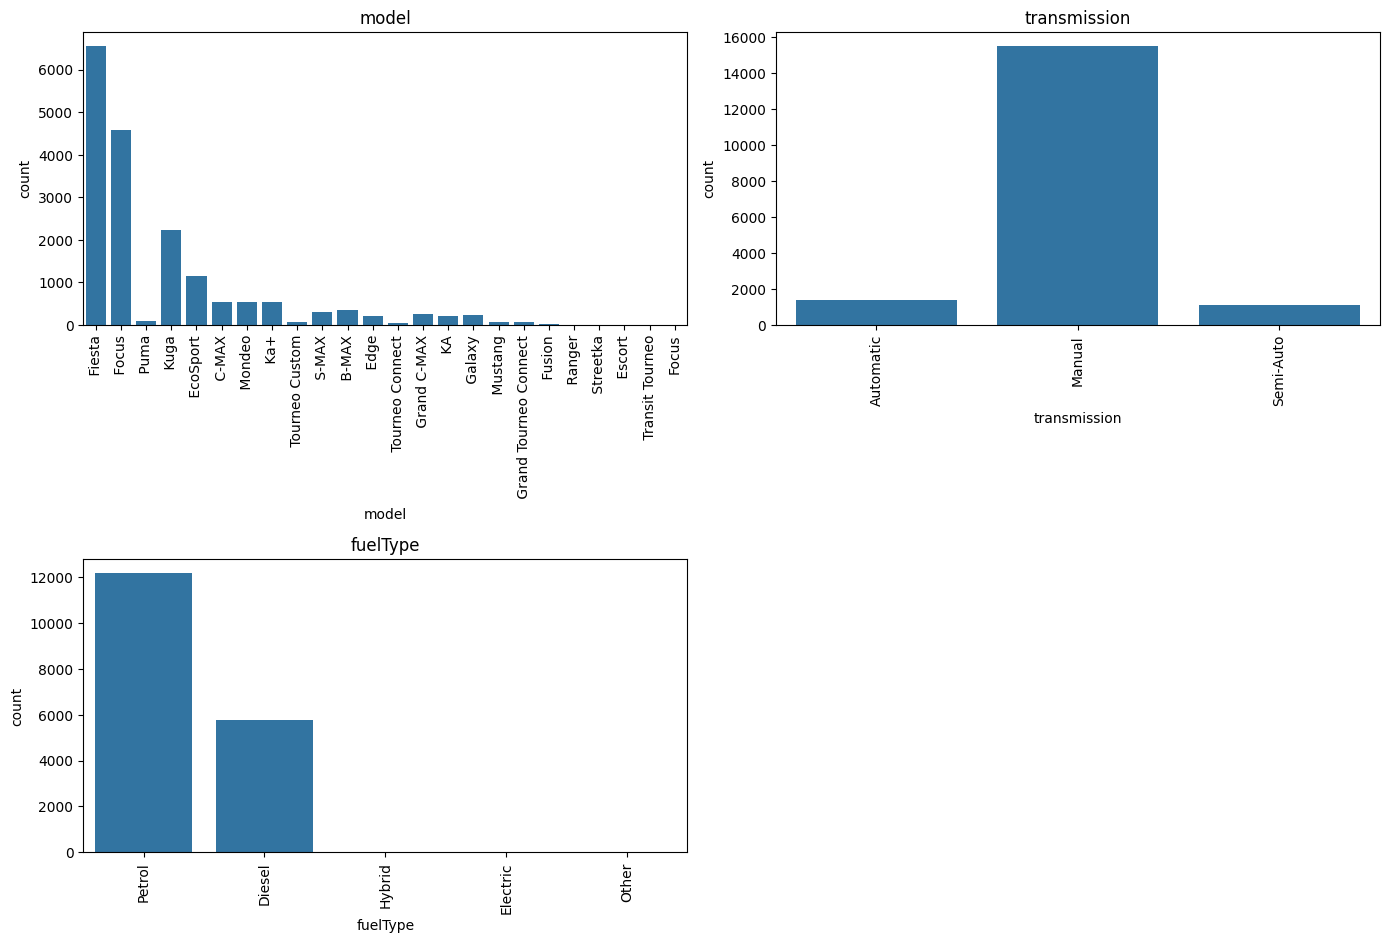

In [35]:
cat_features = ['model','transmission','fuelType']
#plotting countplot for all categorical features
plt.figure(figsize=(14,14))
for i,col in enumerate(cat_features):
    countplot(col,i+1)

plt.show()

In [36]:
#checking for imbalance in transmission
df['transmission'].value_counts(normalize=True)


,proportion
transmission,
Manual,0.863791
Automatic,0.075703
Semi-Auto,0.060507


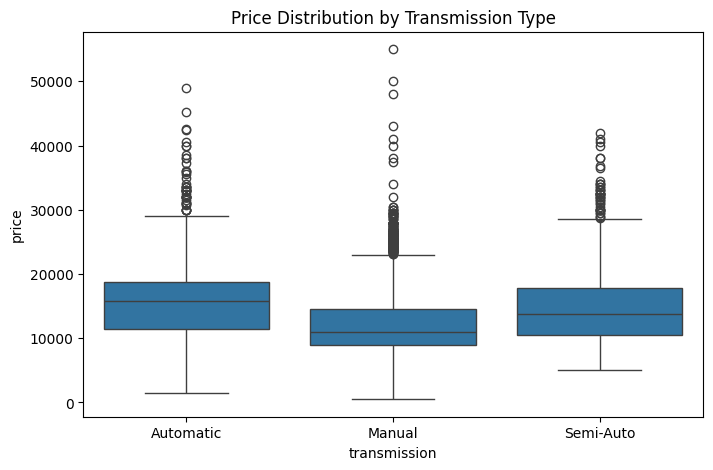

In [37]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='transmission', y='price')
plt.title('Price Distribution by Transmission Type')
plt.show()

In [38]:
#ANOVA for checking significance of transmission
#Null Hypothesis (H₀): All transmission types have same average car price
#Alternative Hypothesis (H₁): At least one transmission type has a different average car price

from scipy.stats import f_oneway

manual_prices = df[df['transmission'] == 'Manual']['price']
auto_prices = df[df['transmission'] == 'Automatic']['price']
semi_auto_prices = df[df['transmission'] == 'Semi-Auto']['price']

f_stat, p_val = f_oneway(manual_prices, auto_prices, semi_auto_prices)
print(f"ANOVA F-statistic: {f_stat:.4f}, p-value: {p_val:.4f}")

ANOVA F-statistic: 655.9557, p-value: 0.0000


Transmission type does affect car price significantly

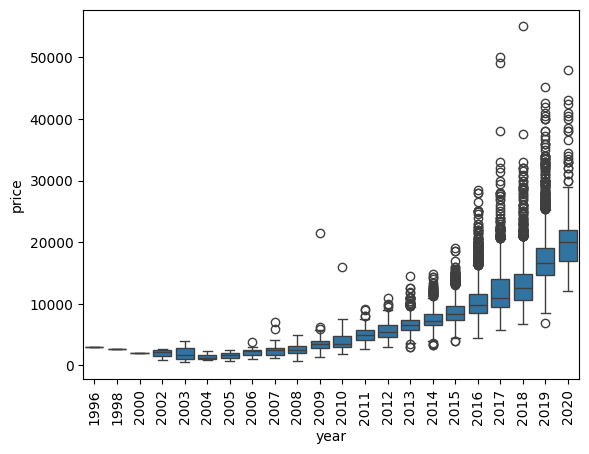

In [39]:
#checking relation between price and year
sns.boxplot(data=df,x='year',y='price')
plt.xticks(rotation=90)
plt.show()

newer car -> more price

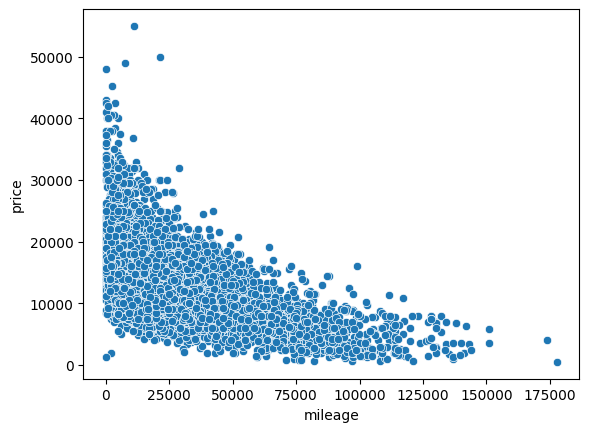

In [40]:
#checking relation between mileage and price
sns.scatterplot(data = df,x='mileage',y='price')
plt.show()

Sort of negative relation

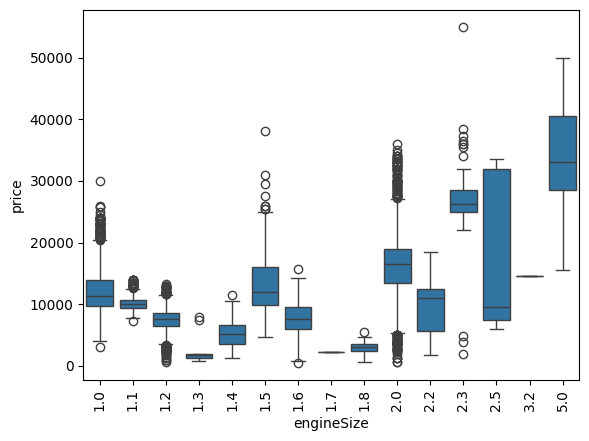

In [41]:
#checking relation of engineSize and price
sns.boxplot(data=df,x='engineSize',y='price')
plt.xticks(rotation=90)
plt.show()

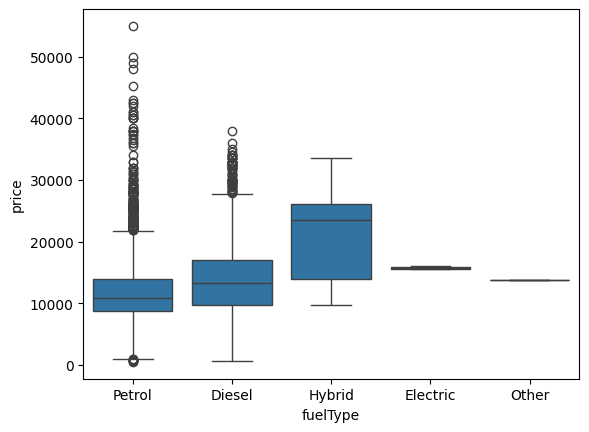

In [42]:
#checking relation between fueltype and price
sns.boxplot(data = df, x = 'fuelType',y = 'price')
plt.show()

In [43]:
#check relation between mpg and price
